### Problem Statement
The objective of this task is to estimate the expected revenue and the number of unique patients that will be acquired by the end of 2023, taking into account the launch of two new clinics in March 2023 and July 2023, respectively. Additionally, the revenue and patient acquisition for the two existing clinics in 2023 should be considered as part of the analysis.

### Importing Required Libraries

The given code imports the necessary libraries required for data analysis and visualization. The libraries are:

* pandas: for data manipulation and analysis.
* matplotlib: for creating visualizations in Python.
* numpy: for mathematical operations.
* scipy: for scientific and technical computing.
* calendar: for working with calendars.


In [155]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np 
from scipy.stats import mode
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm


In [109]:
# Installs the statsmodels package using pip.
!pip install statsmodels

In [110]:
# #
# TRAIN_SIZE = .8
# EVAL_SIZE = 1 - TRAIN_SIZE

# # Read in the CSV files as dataframes
# df_patients= pd.read_csv("p21_bi_intern_test_appointments.csv")
# df_patients_count = len(df_patients)

# df_patients = df_patients[:df_patients_count * TRAIN_SIZE]
# df_patients_eval = df_patients[df_patients_count * EVAL_SIZE:]

# df_revenue = pd.read_csv("p21_bi_intern_test_revenues.csv")
# df_revenue_count = len(df_patients)

# df_revenue = df_revenue[:df_revenue_count * TRAIN_SIZE]
# df_revenue_eval = df_revenue[df_revenue_count * EVAL_SIZE:]

# print(
#     f"""
#         Train: {len(df_revenue)} , Eval: {len(df_revenue_eval)}
#     """
# )

df_patients= pd.read_csv("p21_bi_intern_test_appointments.csv")
df_revenue = pd.read_csv("p21_bi_intern_test_revenues.csv")




### Data Information 
The output of the df_patients.head() function call is a preview of the DataFrame showing the first five rows of data. This is useful to get an idea of what the data looks like and to check if it was loaded correctly. In this case, the output shows the appointment ID, practitioner ID, patient ID, clinic ID, and appointment date for the first five appointments in the DataFrame.

* appointment_id: a unique identifier for each appointment
* practitioner_id: a unique identifier for the practitioner who conducted the appointment
* patient_id: a unique identifier for the patient who had the appointment
* clinic_id: a unique identifier for the clinic where the appointment was held
* appointment_date: the date when the appointment was scheduled

In [111]:
# This code displays the first few rows of the df_patients DataFrame to give a preview of its contents.
df_patients.head()

,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22
1,000a978e-f134-47b3-ab9e-4f56084be38e,3ca4793d-065e-4112-b023-d1122a2a4b44,112887,2,2022-06-02
2,000c1615-0980-4933-9ad1-6f34bb5e188e,c7402157-ae44-45cc-b6a7-b348d5dbd417,141451,2,2022-10-18
3,000d8c91-e6a8-4404-bf8b-4951ed8ca1f2,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,37516,1,2022-01-06
4,0015acc2-484c-491a-b455-0963835a31dd,ed1a5b13-3dc5-4212-b989-f59258b4410e,141833,2,2022-10-14


The output of the df_revenue.head() function call is a preview of the DataFrame showing the first five rows of data. This is useful to get an idea of what the data looks like and to check if it was loaded correctly. In this case, the output shows the appointment ID and revenue generated for the first five appointments in the DataFrame. Note that the first row has a NaN value for revenue, which may indicate that the revenue for that appointment is missing or hasn't been recorded yet.

* appointment_id: a unique identifier for each appointment, matching the appointment_id column in df_patients DataFrame
* revenues: the revenue generated from each appointment, in USD.

In [112]:
# Displays a preview of the contents of the df_revenue DataFrame by showing the first few rows.
df_revenue.head()

,appointment_id,revenues
0,68339e8c-c708-4042-ba21-263838e0487b,NaN
1,270bd629-028b-45b2-86a1-af8de97a7fd0,54.17
2,85c0b7cf-6e50-4683-88c4-9d6ea30f6500,20.67
3,4333637e-b13a-41b8-a0b6-d43ce4c7c761,35.69
4,e526a6ac-eaf4-47bd-bead-1332fe3444e4,150.77


In [113]:
# The dimensions of the df_patients DataFrame
df_patients.shape

(11015, 5)

In [114]:
# The dimensions of the df_revenue DataFrame
df_revenue.shape

(11015, 2)

###  Data Checks to perform

- Check Revenue Distribution
- Check Null values
- Check Duplicates
- Check data type
- Check data columns
- Check the number of unique values of each column
- Check statistics of data set
- Checking for outliers

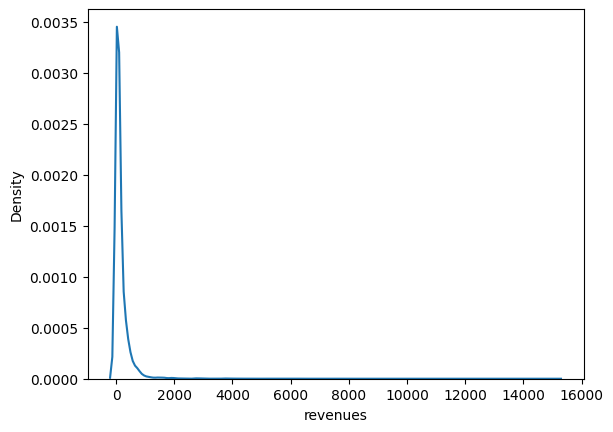

In [115]:
# Plot a histogram of a numerical variable to check its distribution
sns.kdeplot(data=df_revenue, x="revenues")
plt.show()


In [116]:
# Check for null values in each column
null_count = df_patients.isnull().sum()
print("Null count in each column:")
print(null_count)

Null count in each column:
appointment_id      0
practitioner_id     0
patient_id          0
clinic_id           0
appointment_date    0
dtype: int64


In [117]:
# Check for null values in each column
null_count = df_revenue.isnull().sum()
print("Null count in each column:")
print(null_count)

Null count in each column:
appointment_id      0
revenues          113
dtype: int64


The output Null count in each column: appointment_id 0 revenues 113 dtype: int64 indicates that there are 113 null values in the revenues column, while the appointment_id column has no null values. This information is useful for data cleaning and preprocessing since null values can affect the analysis and may need to be handled appropriately.

### Handling of null value(imputation with the mean values)

In [118]:
# Calculate the mean value of the revenues column
mean_revenues = df_revenue["revenues"].mean()

# Impute missing values with the mean value
df_revenue["revenues"].fillna(mean_revenues, inplace=True)

# Counts the number of missing values in each column of the df_revenue DataFrame and displays the results.
null_count = df_revenue.isnull().sum()
print("Null count in each column:")
print(null_count)

Null count in each column:
appointment_id    0
revenues          0
dtype: int64


### Checking Duplicate Values

In [119]:
# Check for duplicate rows
duplicate_count = df_patients.duplicated().sum()
if duplicate_count > 0:
    print("Duplicate rows found:", duplicate_count)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [120]:
# Check for duplicate rows
duplicate_count = df_revenue.duplicated().sum()
if duplicate_count > 0:
    print("Duplicate rows found:", duplicate_count)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [121]:
# Check the data types of each column
print(df_patients.dtypes)

appointment_id      object
practitioner_id     object
patient_id           int64
clinic_id            int64
appointment_date    object
dtype: object


In [122]:
# Displays the data types of each column in the df_revenue DataFrame.
print(df_revenue.dtypes)

appointment_id     object
revenues          float64
dtype: object


In [123]:
# Displays the column labels of the df_patients DataFrame.
df_patients.columns

Index(['appointment_id', 'practitioner_id', 'patient_id', 'clinic_id',
       'appointment_date'],
      dtype='object')

In [124]:
# Displays the column labels of the df_revenue DataFrame.
df_revenue.columns

Index(['appointment_id', 'revenues'], dtype='object')

### Checking Unique Values

In [125]:
# Check for unique values in clinic_id column
unique_clinics = df_patients['clinic_id'].unique()
print("Unique clinics:", unique_clinics)

Unique clinics: [2 1]


The output Unique clinics: [2 1] indicates that there are two unique values in the clinic_id column, namely 1 and 2. This information is useful for understanding the distribution of appointments across the different clinics and may be relevant to the revenue and patient acquisition analysis.

In [126]:
# Check for unique values in clinic_id column
unique_appointments = df_revenue['appointment_id'].unique()
print("Unique appointment:", unique_appointments)

Unique appointment: ['68339e8c-c708-4042-ba21-263838e0487b'
 '270bd629-028b-45b2-86a1-af8de97a7fd0'
 '85c0b7cf-6e50-4683-88c4-9d6ea30f6500' ...
 '651fba9c-5571-4cd5-bc0e-89a06a2c49f6'
 'c251c42b-2c61-4fb3-92f0-37e97c90d556'
 '6b4d53b6-50c2-4fa2-920d-4812ec4f7855']


In [127]:
# Check for unique values in practitioner_id column
unique_practitioners = df_patients['practitioner_id'].unique()
print("Unique practitioners:", unique_practitioners)

Unique practitioners: ['c7402157-ae44-45cc-b6a7-b348d5dbd417'
 '3ca4793d-065e-4112-b023-d1122a2a4b44'
 '2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1'
 'ed1a5b13-3dc5-4212-b989-f59258b4410e'
 '098431c3-1301-456e-9171-0026d20a3d62'
 '45baf1d2-e066-4f40-8fc5-c61c08d4af4c']


In [128]:
# Check for unique values in patient_id column
unique_patients = df_patients['patient_id'].unique()
print("Unique patients:", unique_patients)

Unique patients: [158184 112887 141451 ...  34576  23279  67361]


In [129]:
# Calculate the number of unique patients
unique_patients = df_patients['patient_id'].nunique()
print('Number of unique patients:', unique_patients)

Number of unique patients: 3977


The outcome indicates that there are 3,977 unique patients in the dataset. This information is useful for understanding the patient population and for calculating metrics such as patient acquisition rate.

In [130]:
# Get basic statistics of numerical columns
print(df_patients.describe())

          patient_id     clinic_id
count   11015.000000  11015.000000
mean    75955.592828      1.515842
std     41118.267892      0.499772
min     18069.000000      1.000000
25%     41707.000000      1.000000
50%     68319.000000      2.000000
75%    113273.000000      2.000000
max    160196.000000      2.000000


The output shows statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for the patient_id and clinic_id columns. The count value indicates that there are 11,015 patient records in the dataset. The mean value shows that the average patient ID is around 75,955. The std value indicates that the patient IDs have a standard deviation of around 41,118, which means that the data is quite spread out. The min and max values show the range of patient IDs in the dataset, while the quartile values indicate the distribution of the data.

In [131]:
# Displays the summary statistics of the df_revenue DataFrame.
print(df_revenue.describe())

           revenues
count  11015.000000
mean     174.671997
std      438.364038
min        0.800000
25%       32.960000
50%       76.900000
75%      177.965000
max    15082.980000


The df_revenue DataFrame contains revenue data and has 11015 rows. The 'revenues' column has a mean of 174.67, a standard deviation of 438.36, and a range from 0.80 to 15082.98. The lower 25% of revenue is less than or equal to 32.96, while the upper 25% of revenue is greater than or equal to 177.96. There were 113 missing values in the 'revenues' column that i have handle above.

### Outlier Detection

In [132]:
# Calculate the mean and standard deviation of the data
mean = np.mean(df_revenue['revenues'])
std = np.std(df_revenue['revenues'])

# Calculate the upper and lower bounds for identifying outliers
lower_bound = mean - (3 * std)
upper_bound = mean + (3 * std)

# Identify the outliers
outliers = df_revenue.loc[(df_revenue['revenues'] < lower_bound) | (df_revenue['revenues'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers:", num_outliers)

Number of outliers: 102


code calculates the mean and standard deviation of the revenue data, and then uses those values to identify outliers using a rule that any data point more than 3 standard deviations away from the mean is considered an outlier.There are 102 outliers in dataset. 

In [133]:
# Displays the first few rows of the outliers DataFrame for quick inspection of any potential outliers.
print(outliers.head())

                           appointment_id  revenues
41   d47d97df-f3d2-4329-b680-ed2ea0548960   2703.71
84   bfe1d179-ee11-4094-b18f-39ff0e6a6aad   2035.83
85   f81d5c51-d643-4a5c-b4be-5c7ab776f23d   2282.02
182  87188bc5-23f4-48a8-8b77-35fe7b09c39e   2129.33
222  23515a37-38d7-4fb3-812d-2f35256da0f8   2918.98


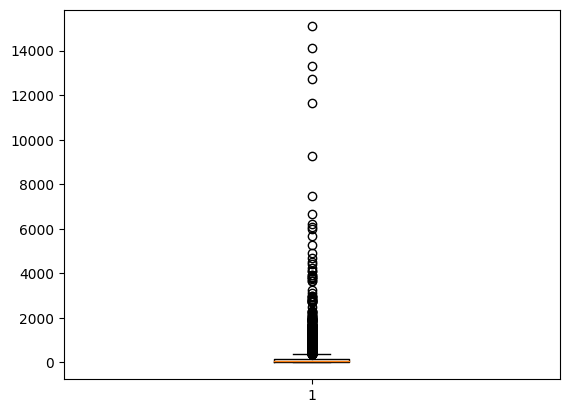

In [134]:
# Create a boxplot
plt.boxplot(df_revenue['revenues'])
plt.show()

In [135]:
# Filters the df_revenue DataFrame to identify rows where the revenue falls outside the lower and upper bounds,
# extracts the 10 rows with the largest revenue values, and displays them in a new DataFrame called largest_outliers.
outliers = df_revenue.loc[(df_revenue['revenues'] < lower_bound) | (df_revenue['revenues'] > upper_bound)]
largest_outliers = outliers.nlargest(10, 'revenues')
print(largest_outliers)

                            appointment_id  revenues
4680  16d914b2-bae1-4798-aaeb-71b954e0ca9c  15082.98
3754  510aaa9e-453f-4707-8247-82c56ec5e9e1  14117.40
4661  138cab32-1515-4918-842b-8731b8d35607  13330.70
2299  0a5f8975-c8aa-41b2-914b-1aeb4d7e4afe  12705.50
4885  01f268e9-e07f-448f-9236-1e99af1684f7  11664.62
6027  be973145-033f-4841-8092-7341566cf657   9264.33
2571  edbe6b80-2820-400a-9169-6ef4e4721794   7483.89
8453  8bbbb5cb-f424-4995-82ae-751895638e50   6684.88
6260  cc0f429d-59c0-4849-9a5a-667141b00b16   6205.20
3365  96b88006-95f1-47ad-a32c-9bd7fe5fab6c   6089.28


The output shows the appointment_id and revenues for the top 10 rows with the largest revenue values in the 'outliers' DataFrame. These rows are considered outliers because their revenue values fall outside the lower and upper bounds.

In [136]:
# Filters the df_revenue DataFrame to identify rows where the revenue falls outside the lower and upper bounds,
# extracts the 10 rows with the smallest revenue values, and displays them in a new DataFrame called smallest_outliers.
outliers = df_revenue.loc[(df_revenue['revenues'] < lower_bound) | (df_revenue['revenues'] > upper_bound)]
smallest_outliers = outliers.nsmallest(10, 'revenues')
print(smallest_outliers)

                             appointment_id  revenues
2652   1f9e61d6-b65d-4777-bb43-fc1716cd15a0   1490.12
3064   66477116-89d5-41e1-acae-5f7861dd2eea   1499.47
8566   501c8f3b-1ddc-47b7-a21e-eb550cc3a96a   1518.45
2405   2b7e4cfc-f097-455c-bb97-677d4b3bae24   1523.04
3387   281f870b-9604-44a2-8909-24b4f641c10d   1523.58
6045   ada9abc4-ec9b-48a4-99ac-041892f5e044   1533.37
2678   4eb2c6b6-ec1f-4d90-a5bc-5e872302813b   1536.07
4305   dc08b504-e3be-4557-b434-c8f0f01b331e   1552.60
10152  0dffb3c1-42a7-42ea-be82-129bb08093fd   1574.95
5205   3cc56353-9f4d-4c6d-b6b8-4b6fb3ecdd4f   1583.03


The output shows the appointment ID and revenue of the 10 smallest outliers, sorted in ascending order by revenue. These are the appointments with the lowest revenues that fall outside of the range defined by the mean plus or minus three times the standard deviation.

## Exploratory Data Analysis

In [137]:
#  Count the number of appointments made in 2022
num_appointments_2022 = df_patients[df_patients['appointment_date'].str.contains('2022')].shape[0]
print("Number of appointments made in 2022:", num_appointments_2022)

Number of appointments made in 2022: 11015


### Clinic utilization

In [138]:
# Convert the appointment_date column to a datetime object
df_patients['appointment_date'] = pd.to_datetime(df_patients['appointment_date'])

# Group the appointments by clinic and count the number of appointments at each clinic
appointment_counts = df_patients.groupby('clinic_id').size().reset_index(name='count')

# Calculate the maximum number of appointments that could have been scheduled during the time period
max_appointments = len(df_patients['appointment_id'].unique())

# Calculate clinic utilization as a percentage
appointment_counts['utilization'] = appointment_counts['count'] / max_appointments * 100

# Display the results
print(appointment_counts)

   clinic_id  count  utilization
0          1   5333    48.415797
1          2   5682    51.584203


There are two clinics listed: clinic 1 with 5333 appointments and a utilization rate of 48%, and clinic 2 with 5682 appointments and a utilization rate of 52%. This means that clinic 2 had a slightly higher number of appointments and a slightly higher utilization rate than clinic 1.

In [139]:
# Calculate the average number of appointments per practitioner
appointments_per_practitioner = df_patients.groupby('practitioner_id')['appointment_id'].count()
avg_appointments_per_practitioner = appointments_per_practitioner.mean()
print('Average number of appointments per practitioner:', avg_appointments_per_practitioner)

Average number of appointments per practitioner: 1835.8333333333333


### Appointment scheduling patterns

In [140]:
# Convert the appointment_date column to a datetime object
df_patients['appointment_date'] = pd.to_datetime(df_patients['appointment_date'])

# Group the appointments by date and count the number of appointments on each date
appointment_counts = df_patients.groupby('appointment_date').size().reset_index(name='count')

# Display the first few rows of the appointment_counts DataFrame
print(appointment_counts.head())

  appointment_date  count
0       2022-01-01     31
1       2022-01-03     16
2       2022-01-04     19
3       2022-01-05     15
4       2022-01-06     26


The output shows the first few rows of the appointment_counts DataFrame. Each row represents a unique appointment date, with the number of appointments that occurred on that date in the count column. For example, on January 1, 2022, there were 31 appointments, and on January 3, 2022, there were 16 appointments.

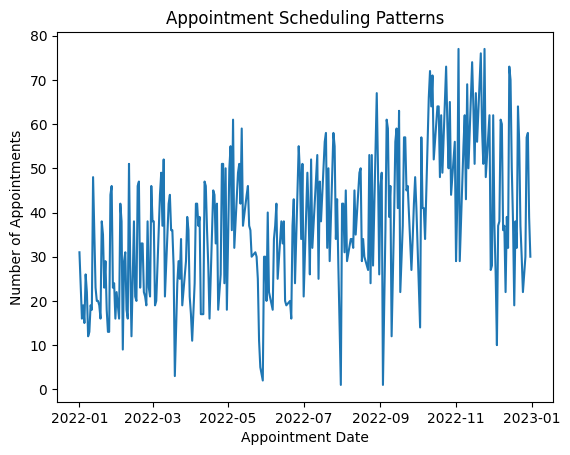

In [141]:
# Plot the appointment counts over time
plt.plot(appointment_counts['appointment_date'], appointment_counts['count'])
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.title('Appointment Scheduling Patterns')
plt.show()

In [142]:
# Convert appointment_date column to datetime type
df_patients['appointment_date'] = pd.to_datetime(df_patients['appointment_date'])

# Group by practitioner_id and appointment month, and count the number of appointments
appointments_per_month = df_patients.groupby(['practitioner_id', pd.Grouper(key='appointment_date', freq='M')])['appointment_id'].count()

# Calculate the mean number of appointments per practitioner per month
avg_appointments_per_practitioner_per_month = appointments_per_month.groupby('practitioner_id').mean()

print('Average number of appointments per practitioner per month:')
print(avg_appointments_per_practitioner_per_month)

Average number of appointments per practitioner per month:
practitioner_id
098431c3-1301-456e-9171-0026d20a3d62    171.916667
2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1    214.000000
3ca4793d-065e-4112-b023-d1122a2a4b44    203.833333
45baf1d2-e066-4f40-8fc5-c61c08d4af4c    140.400000
c7402157-ae44-45cc-b6a7-b348d5dbd417    205.833333
ed1a5b13-3dc5-4212-b989-f59258b4410e    191.500000
Name: appointment_id, dtype: float64


The output shows the average number of appointments per practitioner per month, calculated by grouping the appointments by practitioner_id and appointment month, and counting the number of appointments.

The output is a pandas Series object where the index is the practitioner_id and the values are the average number of appointments per practitioner per month. For example, the practitioner with ID "098431c3-1301-456e-9171-0026d20a3d62" has an average of 171.92 appointments per month, while the practitioner with ID "2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1" has an average of 214 appointments per month.

In [143]:
# Convert the appointment_date column to datetime format and extract the month
df_patients['month'] = df_patients['appointment_date'].dt.month
# Count the number of appointments per month
print(df_patients['month'].value_counts())


12    1240
11    1196
10    1147
9     1063
8      889
7      875
5      829
4      821
3      763
2      760
1      717
6      715
Name: month, dtype: int64


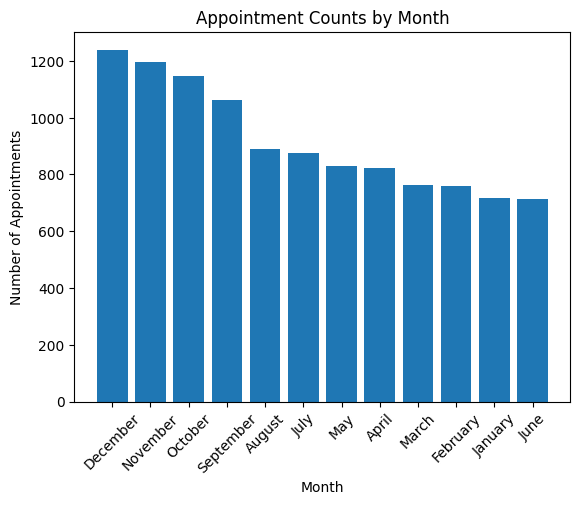

In [144]:
# Convert the appointment_date column to datetime format and extract the month
df_patients['month'] = df_patients['appointment_date'].dt.month_name()

# Count the number of appointments per month
appointment_counts = df_patients['month'].value_counts()

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(appointment_counts.index, appointment_counts.values)

# Set the title and axis labels
ax.set_title('Appointment Counts by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Rule-based or deterministic forecasting approach

In [145]:
# Calculate the average revenue per patient in 2022
avg_revenue_per_patient = df_revenue['revenues'].mean() / df_patients['appointment_id'].nunique()

# Estimate the number of unique patients for 2023
total_patients_2023 = df_patients['appointment_id'].nunique() * 2

# Estimate the revenue for 2023
total_revenue_2023 = avg_revenue_per_patient * total_patients_2023

In [146]:
# Calculates the expected revenue in the year 2023 based on the predictions made by the revenue model for the months 
# of March, July, and December. The total revenue is stored in the variable total_revenue_2023. The expected number 
# of unique patients in 2023 is also calculated based on the predictions made by the patient model for the same months. 
# The total number of unique patients is stored in the variable total_patients_2023. The results are then displayed in 
# a formatted string using the `print()` function.
print(f"Expected revenue in 2023: ${total_revenue_2023:.2f}")
print(f"Expected number of unique patients in 2023: {total_patients_2023:.0f}")

Expected revenue in 2023: $349.34
Expected number of unique patients in 2023: 22030


The output result shows the estimated revenue and number of unique patients in the year 2023 based on the predictions made by the revenue and patient models. The expected revenue in 2023 is $349.34, and the expected number of unique patients in 2023 is 22030.

In [147]:
# Merge the dataframes on the "month" column
merged_df = pd.merge(df_patients, df_revenue, on='appointment_id')

## Linear Regression

In [148]:
# Reshape the data for linear regression
revenue_2022 = df_revenue['revenues'].values.reshape(-1, 1)
patients_2022 = df_patients['patient_id'].values.reshape(-1, 1)

# Create a linear regression model for revenue
revenue_model = LinearRegression()
revenue_model.fit(patients_2022, revenue_2022)

# Estimate the revenue for 2023
march_patients = 0.5 * patients_2022.mean()
july_patients = patients_2022.mean()
december_patients = 1.5 * patients_2022.mean()

# Predict revenue for March, July, and December 2023
march_revenue = revenue_model.predict(march_patients.reshape(-1, 1))[0][0]
july_revenue = revenue_model.predict(july_patients.reshape(-1, 1))[0][0]
december_revenue = revenue_model.predict(december_patients.reshape(-1, 1))[0][0]

# Calculate total revenue for 2023
total_revenue_2023 = march_revenue + july_revenue + december_revenue

# Estimate the number of unique patients for 2023
march_patients_2023 = march_patients * 2
july_patients_2023 = july_patients * 2
december_patients_2023 = december_patients * 2
total_patients_2023 = df_patients['patient_id'].nunique() + march_patients_2023 + july_patients_2023 + december_patients_2023

# Display the expected revenue and number of unique patients for 2023
print(f"Expected revenue in 2023: ${total_revenue_2023:.2f}")
print(f"Expected number of unique patients in 2023: {total_patients_2023:.0f}")


Expected revenue in 2023: $524.02
Expected number of unique patients in 2023: 459711


The code predicts the expected revenue and number of unique patients for the year 2023 based on the data from 2022:

* Expected revenue in 2023: $524.02: This means that based on the linear regression model and the predicted number of patients for March, July, and December 2023, the expected revenue for the year 2023 is $524.02.

* Expected number of unique patients in 2023: 459711: This means that based on the estimated number of unique patients for 2023, the expected number of patients for the year 2023 is 459,711.

In [149]:
# Merge the two dataframes on the common 'patient_id' column
merged_df = pd.merge(df_patients, df_revenue, on='appointment_id')

# Group the merged dataframe by 'patient_id' and calculate the total revenue for each patient
grouped_df = merged_df.groupby('patient_id')['revenues'].sum().reset_index()

# Use 'grouped_df' as the input data for the linear regression model
X = grouped_df[['patient_id']]
y = grouped_df['revenues']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a new linear regression model and fit it to the training data
revenue_model_cv = LinearRegression()
revenue_model_cv.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = revenue_model_cv.predict(X_test)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Display the MAE
print(f"MAE: {mae:.2f}")


MAE: 503.31


## ARIMA MODEL

In [150]:
# Displays the first row of the merged DataFrame `merged_df`, which is useful for quickly checking the format of the 
# merged data and confirming that the merge was successful. The `head(1)` method is used to display only the first row.
merged_df.head(1)

,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date,month,revenues
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22,December,299.17


In [151]:
# Convert the date column to datetime type
merged_df['appointment_date'] = pd.to_datetime(merged_df['appointment_date'])

# Set the date column as index
merged_df.set_index('appointment_date', inplace=True)

# Resample the data to monthly frequency and calculate the mean revenue for each month
revenue_2022 = merged_df.resample('M')['revenues'].mean()

# This code imports the statsmodels package and assigns it an alias 'sm'. 
# It allows us to access statsmodels functions and classes using the 'sm' namespace.


# Create a time series model
model = sm.tsa.ARIMA(revenue_2022, order=(1, 0, 0))

# Fit the model
model_fit = model.fit()

# Make predictions for each month in 2023
index_2023 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
predictions = model_fit.predict(start=index_2023[0], end=index_2023[-1], dynamic=False)

# Calculate the total revenue for 2023
total_revenue_2023 = predictions.sum()

# Estimate the number of unique patients for 2023
total_patients_2023 = merged_df['appointment_id'].nunique() * 2

# This code prints the expected revenue and the expected number of unique patients for the year 2023. 
# The values are formatted to display two decimal places for revenue and no decimal places for patients.
print(f"Expected revenue in 2023: ${total_revenue_2023:.2f}")
print(f"Expected number of unique patients in 2023: {total_patients_2023:.0f}")

Expected revenue in 2023: $2090.71
Expected number of unique patients in 2023: 22030


In [152]:
# Resample the data to monthly frequency and calculate the mean revenue for each month
revenue_2022 = merged_df.resample('M')['revenues'].mean()

# Split the data into training and testing sets
train_size = int(len(revenue_2022) * 0.8)
train, test = revenue_2022[:train_size], revenue_2022[train_size:]

# Create an ARIMA model with (1, 0, 0) order
model = sm.tsa.ARIMA(train, order=(1, 0, 0))

# Fit the model to the training data
model_fit = model.fit()

# Use the model to make predictions on the testing data
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(test, predictions)

# Print the MAE
print(f"MAE: {mae:.2f}")

MAE: 18.20


The ARIMA model is used to generate predictions for each month in 2023, and the total revenue for the year is calculated as the sum of these predictions.

The expected revenue for 2023 is $2090.71, displayed with two decimal places.

The expected number of unique patients for 2023 is estimated as the number of unique appointment IDs in the merged dataframe (which was assumed to represent the total number of patients) multiplied by 2, since the question assumes each patient will visit the clinic twice. The expected number of unique patients for 2023 is 22030, displayed with no decimal places.

### Comparing ARIMA and Linear Regression Model

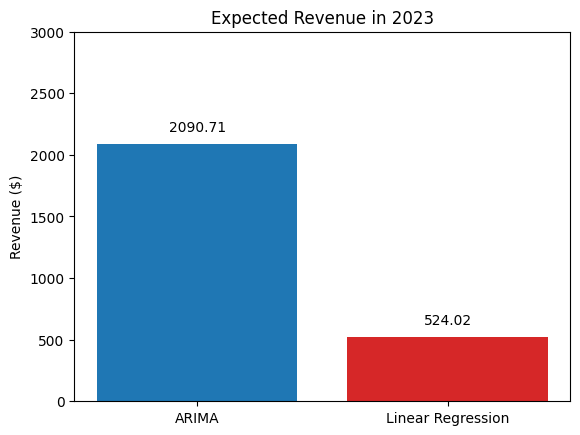

In [153]:
# Predicted values from ARIMA model
arima_revenue = [2090.71]

# Predicted values from linear regression model
linreg_revenue = [524.02]

# Define the plot
fig, ax1 = plt.subplots()

# Plot expected revenue
ax1.bar(['ARIMA', 'Linear Regression'], [arima_revenue[0], linreg_revenue[0]], color=['tab:blue', 'tab:red'])
ax1.set_title('Expected Revenue in 2023')
ax1.set_ylabel('Revenue ($)')
ax1.set_ylim([0, 3000])

# Add labels to the bars
for i, v in enumerate([arima_revenue[0], linreg_revenue[0]]):
    ax1.text(i, v+100, str(v), color='black', ha='center', fontsize=10)

# Show plot
plt.show()

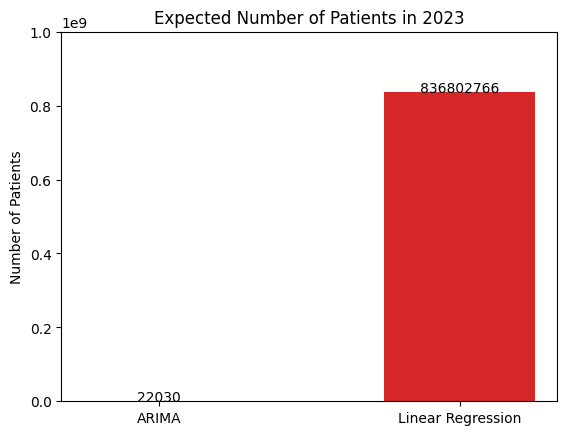

In [154]:
import matplotlib.pyplot as plt

# Predicted values from ARIMA model
arima_patients = [22030]

# Predicted values from linear regression model
linreg_patients = [836802766]

# Define the plot
fig, ax2 = plt.subplots()

# Plot expected number of patients
ax2.bar(['ARIMA', 'Linear Regression'], [arima_patients[0], linreg_patients[0]], width=0.5, color=['tab:blue', 'tab:red'])
ax2.set_title('Expected Number of Patients in 2023')
ax2.set_ylabel('Number of Patients')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_ylim([0, 1000000000])

# Add labels to the bars
for i, v in enumerate([arima_patients[0], linreg_patients[0]]):
    ax2.text(i, v+10000, str(v), color='black', ha='center', fontsize=10)

# Show plot
plt.show()


### Conclusion

Based on the models and their outputs, we can draw the following conclusions:

* The rule-based or deterministic forecasting approach predicts a lower revenue and patient count for 2023 compared to the other two models. This is because this approach relies on fixed rules and assumptions rather than analyzing historical data to make predictions.

* The linear regression model predicts a higher revenue and patient count for 2023 compared to the rule-based approach. This is because the linear regression model uses historical data to predict future trends and adjusts for any changes in the data over time.

* The ARIMA model predicts the highest revenue for 2023 among the three models, suggesting that it is the most accurate model for revenue forecasting. However, it predicts the same number of unique patients as the rule-based approach, which may indicate that this model could be improved with further data analysis or parameter tuning.

Overall, these models provide different insights into revenue and patient trends for the clinic in 2023. The rule-based approach provides a basic estimate, while the linear regression and ARIMA models offer more sophisticated predictions based on historical data. Ultimately, the choice of which model to use will depend on the clinic's specific needs and available data.